<a href="https://colab.research.google.com/github/bimal-bp/ml_models/blob/ML_MODELS/1st_SMS_SPAM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df =pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(3)

,v1,v2
2006,ham,Shopping lor. Them raining mah hard 2 leave or...
1977,spam,Reply to win å£100 weekly! Where will the 2006...
4082,ham,"Good afternoon, my love. It was good to see yo..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
from sklearn.preprocessing  import LabelEncoder
enc=LabelEncoder()
df['target']=enc.fit_transform(df['target'])


In [11]:
df.sample(3)

,target,text
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
4958,0,"What i mean was i left too early to check, cos..."
212,0,K:)k:)good:)study well.


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

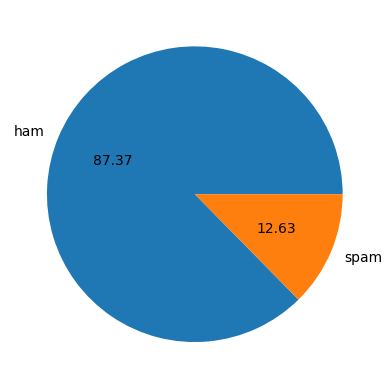

In [18]:
import matplotlib.pyplot  as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [19]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['nocha']=df['text'].apply(len)

In [21]:
df.head(2)

,target,text,nocha
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [22]:
df['nowords']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head(2)

,target,text,nocha,nowords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [24]:
df['nosentence']=df['text'].apply(lambda x:len( nltk.sent_tokenize(x)))

In [25]:
df[['nocha','nowords','nosentence']].describe()

,nocha,nowords,nosentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==0][['nocha','nowords','nosentence']].describe()

,nocha,nowords,nosentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['nocha','nowords','nosentence']].describe()

,nocha,nowords,nosentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='nocha', ylabel='Count'>

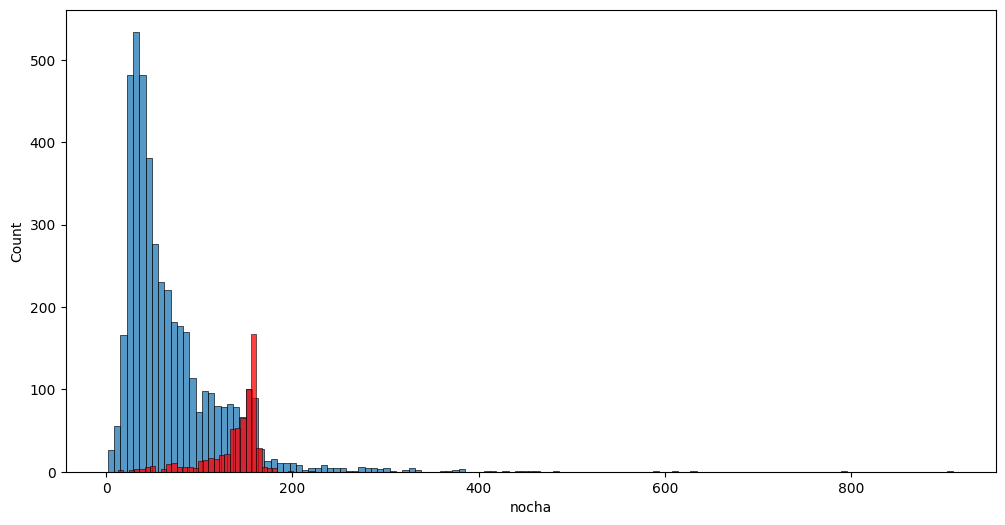

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['nocha'])
sns.histplot(df[df['target']==1]['nocha'],color='red')

<Axes: xlabel='nowords', ylabel='Count'>

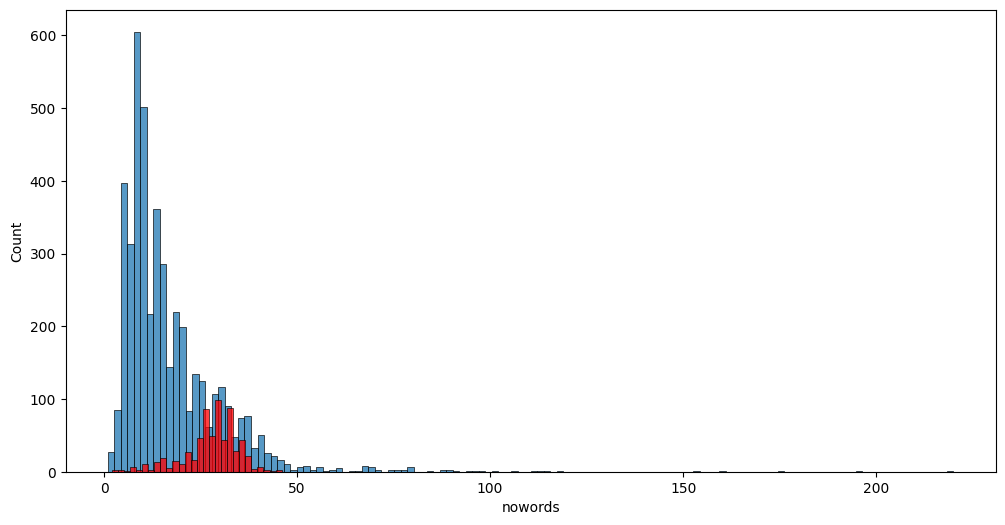

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['nowords'])
sns.histplot(df[df['target']==1]['nowords'],color='red')

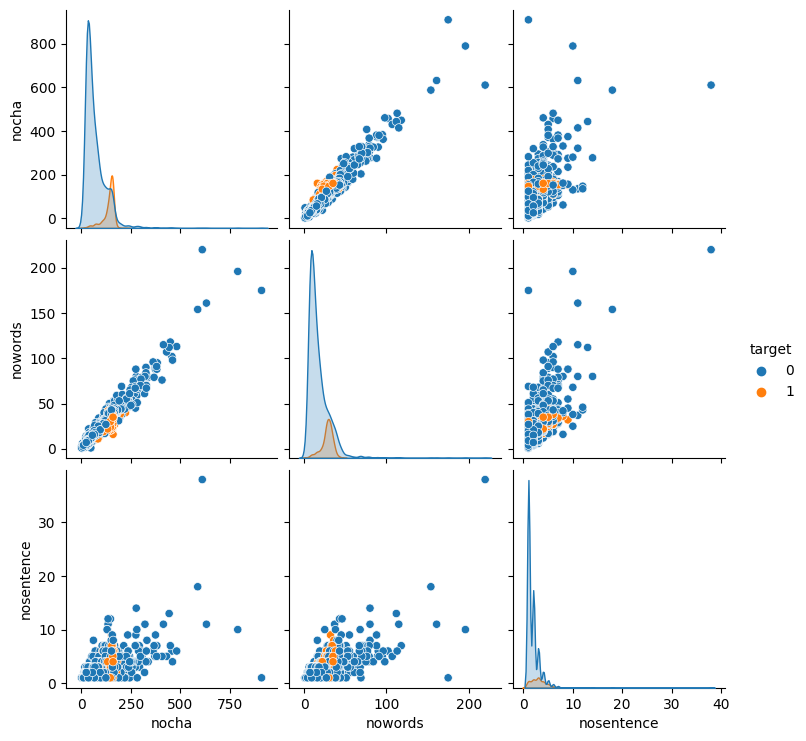

In [30]:
sns.pairplot(df,hue='target')

<ipython-input-31-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

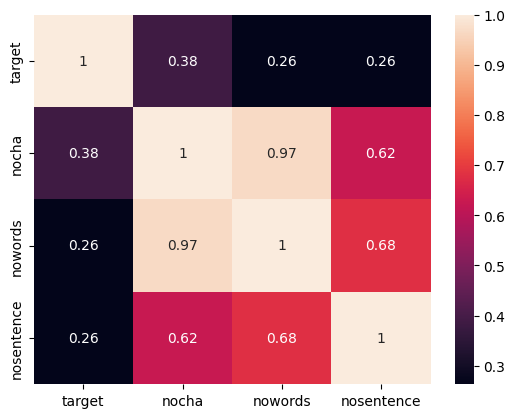

In [31]:
sns.heatmap(df.corr(),annot=True)

data processing

In [32]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string


In [33]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data if not already downloaded
nltk.download('stopwords')

# Access the list of stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english')and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [35]:
df.head(2)

,target,text,nocha,nowords,nosentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough")

'gon na home soon want talk stuff anymor tonight k cri enough'

In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head(2)

,target,text,nocha,nowords,nosentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

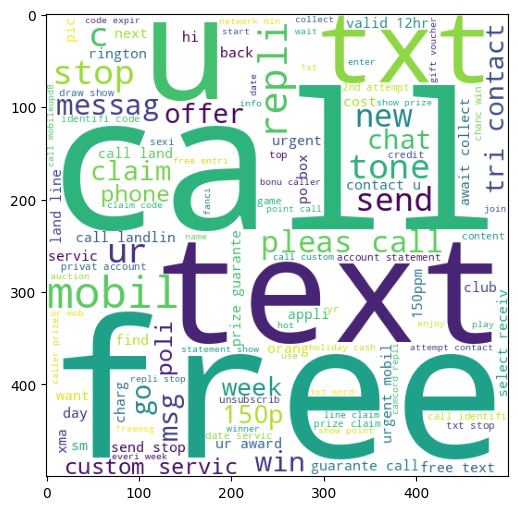

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

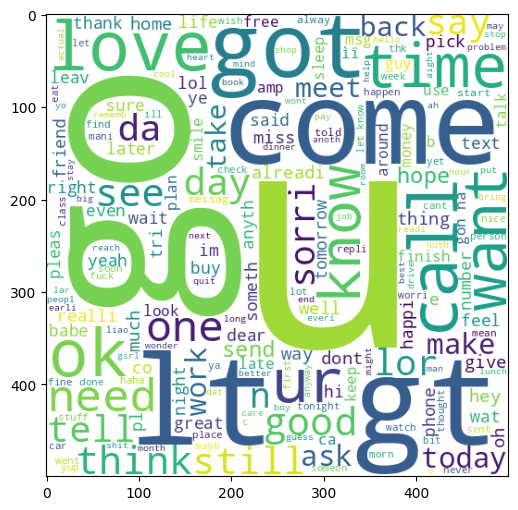

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

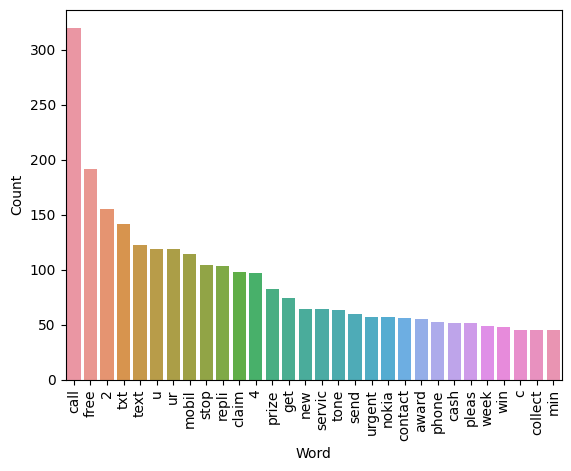

In [47]:
from collections import Counter
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [48]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

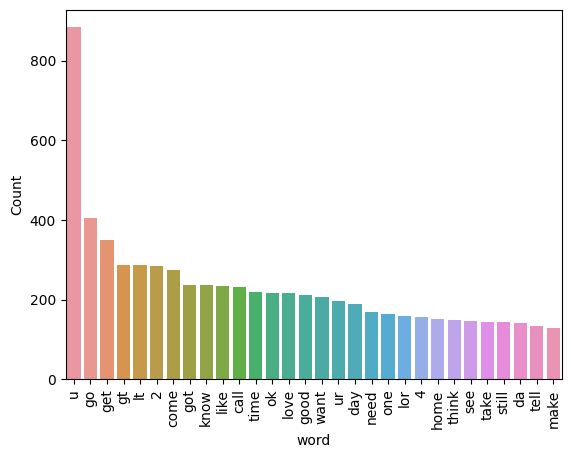

In [49]:
from collections import Counter
common_words_df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','Count'])
sns.barplot(x='word',y='Count',data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

MODEL BUILDING

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=30000)

In [51]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
x.shape

(5169, 6708)

In [53]:
y=df['target'].values

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [58]:
mnb.fit(xtrain,ytrain)
ypred2 = mnb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [59]:
bnb.fit(xtrain,ytrain)
ypred3 = bnb.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb':xgb
}

In [63]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
  clf.fit(xtrain,ytrain)
  ypred=clf.predict(xtest)
  accuracy=accuracy_score(ytest,ypred)
  precision = precision_score(ytest,ypred)

  return accuracy,precision


In [64]:
train_classifier(svc,xtrain,ytrain,xtest,ytest)

(0.9729206963249516, 0.9741379310344828)

In [65]:
from sklearn.metrics import accuracy_score, precision_score

# Define the train_classifier function
def train_classifier(clf, xtrain, ytrain, xtest, ytest):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    return accuracy, precision

# Create empty lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, xtrain, ytrain, xtest, ytest)

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
For KN
Accuracy: 0.9003868471953579
Precision: 1.0
For NB
Accuracy: 0.9593810444874274
Precision: 1.0
For DT
Accuracy: 0.9361702127659575
Precision: 0.8461538461538461
For LR
Accuracy: 0.9516441005802708
Precision: 0.94
For RF
Accuracy: 0.971953578336557
Precision: 1.0
For AdaBoost
Accuracy: 0.9613152804642167
Precision: 0.9454545454545454
For BgC
Accuracy: 0.9584139264990329
Precision: 0.8625954198473282
For ETC
Accuracy: 0.9729206963249516
Precision: 0.9824561403508771
For GBDT
Accuracy: 0.9526112185686654
Precision: 0.9238095238095239
For xgb
Accuracy: 0.9700193423597679
Precision: 0.9349593495934959


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [67]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.936170,0.846154
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [68]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [69]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.936170
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.961315
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.972921
9,GBDT,Accuracy,0.952611


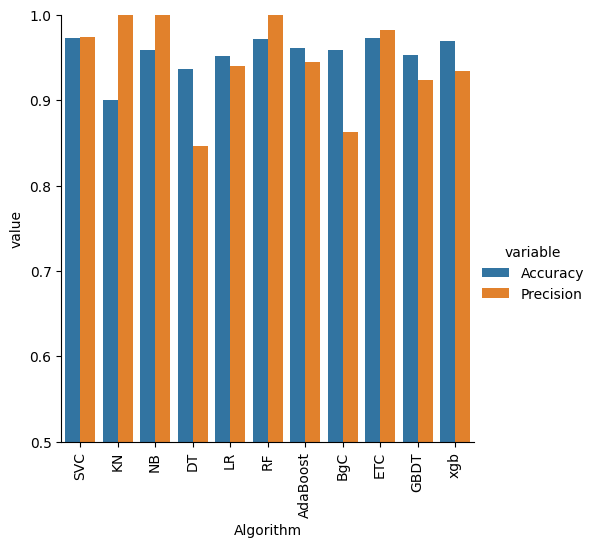

In [70]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation ='vertical')
plt.show()

MODEL IMPROVEMENT

In [71]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
1,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
2,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
3,DT,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154,0.936170,0.846154
4,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
5,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
6,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
7,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595
8,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
9,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810


In [72]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [73]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimators=RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimators)
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
print("Accuracy",accuracy_score(ytest,ypred))
print("Precision",precision_score(ytest,ypred))


Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))